In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
#np.random.seed(MASTER_SEED)
import tensorflow as tf
#tf.set_random_seed(MASTER_SEED)
import matplotlib.pyplot as plt
import keras

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
keras.backend.set_session(tf.compat.v1.Session(config=config))
    
import time
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import *
from keras.activations import relu, sigmoid
from keras.optimizers import Adam, Nadam

import cv2
import math

Using TensorFlow backend.


<class 'numpy.ndarray'>


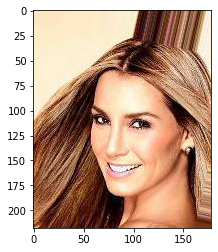

In [2]:
im = cv2.cvtColor(cv2.imread("dataset/img/000001.jpg"), cv2.COLOR_BGR2RGB)
print(type(im))
plt.imshow(im)

In [3]:
print("dataset/img/%06d.jpg" % 1)

dataset/img/000001.jpg


In [7]:
del imgs
imgnum = 202599 # 202599
imgs = np.empty([imgnum, 218, 178, 3], dtype=np.uint8)
imgmod = np.empty([imgnum, 108, 88, 3], dtype=np.uint8)
interv = int(math.ceil(imgnum/10))
for i in range(imgnum):
    if(i%interv==0):
        print(int(i//interv), end="")
    imgs[i] = cv2.imread("dataset/img/%06d.jpg" % (i+1)) # cv2.cvtColor(cv2.imread("dataset/img/%06d.jpg" % (i+1)), cv2.COLOR_BGR2RGB)
    imgmod[i] = cv2.resize(imgs[i], dsize=(88, 108), interpolation=cv2.INTER_AREA)
    cv2.imwrite("img_mod/%06d.jpg" % (i+1), imgmod[i])
print("\nDone.")

0123456789
Done.


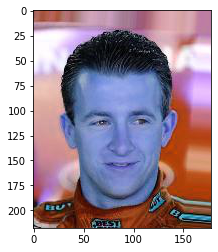

In [6]:
plt.imshow(imgs[22])

In [12]:
Y_train = np.loadtxt("dataset/list_attr_celeba.csv", delimiter=",", skiprows=1, usecols=range(1, 41))

In [13]:
Y_train += 1
Y_train /= 2

In [14]:
print(Y_train[:5])

[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]]
